# 3D Scene Completion

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

segmented_images_folder = '/transfer/MasterProject/test_segmented2'
depth_image_path = '/transfer/MasterProject/depth_test/2_depth_fp32.npy'

depth_image = np.load(depth_image_path)

segmented_images = [f for f in os.listdir(segmented_images_folder) if f.endswith('.png')]

output_folder = '/transfer/MasterProject/extracted_depth_images2'
os.makedirs(output_folder, exist_ok=True)

extracted_depths_trans = {}

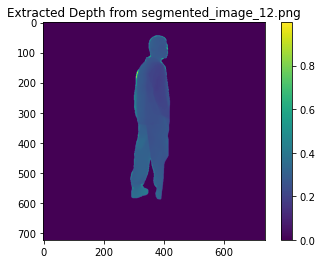

Saved and displayed extracted depth image for segmented_image_12.png to /transfer/MasterProject/extracted_depth_images2/extracted_segmented_image_12.png


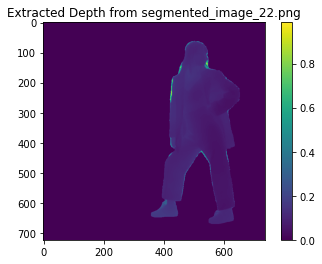

Saved and displayed extracted depth image for segmented_image_22.png to /transfer/MasterProject/extracted_depth_images2/extracted_segmented_image_22.png


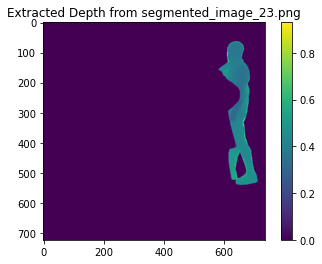

Saved and displayed extracted depth image for segmented_image_23.png to /transfer/MasterProject/extracted_depth_images2/extracted_segmented_image_23.png


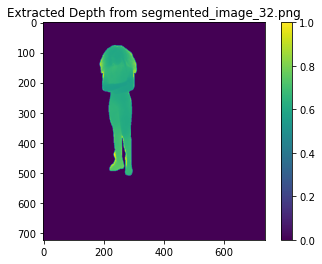

Saved and displayed extracted depth image for segmented_image_32.png to /transfer/MasterProject/extracted_depth_images2/extracted_segmented_image_32.png


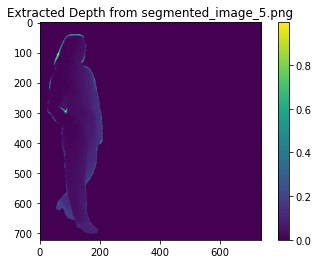

Saved and displayed extracted depth image for segmented_image_5.png to /transfer/MasterProject/extracted_depth_images2/extracted_segmented_image_5.png
Saved all extracted depth information to /transfer/MasterProject/extracted_depths_trans2.npy


In [12]:
for segmented_image_name in segmented_images:
    segmented_image_path = os.path.join(segmented_images_folder, segmented_image_name)
    

    segmented_image = Image.open(segmented_image_path).convert('RGBA')
    segmented_image = np.array(segmented_image)
    
    alpha_channel = segmented_image[:, :, 3]
    mask = alpha_channel > 0  
    
    extracted_depth = np.zeros_like(depth_image)
    extracted_depth[mask] = depth_image[mask]
    
    extracted_depths_trans[segmented_image_name] = extracted_depth
    
    plt.imshow(extracted_depth, cmap='viridis')
    plt.title(f'Extracted Depth from {segmented_image_name}')
    plt.colorbar()
    
    output_path = os.path.join(output_folder, f'extracted_{segmented_image_name}')
    plt.savefig(output_path)
    
    plt.show()
    
    plt.close()

    print(f'Saved and displayed extracted depth image for {segmented_image_name} to {output_path}')

output_npy_path = '/transfer/MasterProject/extracted_depths_trans2.npy'
np.save(output_npy_path, extracted_depths_trans)
print(f'Saved all extracted depth information to {output_npy_path}')

In [13]:
test = np.load('/transfer/MasterProject/extracted_depths_trans2.npy', allow_pickle=True)
test

array({'segmented_image_12.png': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 'segmented_image_22.png': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 'segmented_image_23.png': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 'segmented_image_32.png': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
    

In [14]:
extracted_depths_trans = test.item()
segmented_image_5_depth = extracted_depths_trans.get('segmented_image_5.png')
print(segmented_image_5_depth.shape)

(723, 736)


In [15]:
import numpy as np

test = np.load('/transfer/MasterProject/extracted_depths_trans2.npy', allow_pickle=True)

if isinstance(test, np.ndarray) and test.size > 0:
    extracted_depths_trans = test.item()  
    
    if isinstance(extracted_depths_trans, dict):
        results = []

        for image_name, depth_map in extracted_depths_trans.items():
            y_indices, x_indices = np.where(depth_map > 0)
            
            if len(x_indices) > 0 and len(y_indices) > 0:
                x_mean = np.mean(x_indices)
                y_mean = np.mean(y_indices)
                
                results.append((image_name, x_mean, y_mean))

        results_array = np.array(results, dtype=object)

        for result in results_array:
            print(f"Image: {result[0]}, X mean: {result[1]:.2f}, Y mean: {result[2]:.2f}")

        output_results_path = '/transfer/MasterProject/center_positions.npy'
        np.save(output_results_path, results_array)
        print(f'Saved results to {output_results_path}')
    else:
        print("The item in the numpy array is not a dictionary")
else:
    print("The numpy array is empty or does not contain the expected dictionary")


Image: segmented_image_12.png, X mean: 359.95, Y mean: 321.81
Image: segmented_image_22.png, X mean: 519.68, Y mean: 363.49
Image: segmented_image_23.png, X mean: 650.06, Y mean: 300.79
Image: segmented_image_32.png, X mean: 254.26, Y mean: 259.52
Image: segmented_image_5.png, X mean: 119.94, Y mean: 343.68
Saved results to /transfer/MasterProject/center_positions.npy


In [16]:
results_array

array([['segmented_image_12.png', 359.95310025581676, 321.8063710561579],
       ['segmented_image_22.png', 519.6798337908713, 363.4947178397086],
       ['segmented_image_23.png', 650.057305353991, 300.78819376348304],
       ['segmented_image_32.png', 254.2637944540185, 259.5237035876547],
       ['segmented_image_5.png', 119.94232913368269, 343.67678949715685]],
      dtype=object)

In [17]:
import numpy as np

extracted_depths_path = '/transfer/MasterProject/extracted_depths_trans2.npy'
try:
    extracted_depths = np.load(extracted_depths_path, allow_pickle=True).item()
except Exception as e:
    print(f"Error loading {extracted_depths_path}: {e}")
    raise

average_depths = []

if not isinstance(extracted_depths, dict):
    raise ValueError("Loaded data is not a dictionary. Please check the format of the npy file.")

for segmented_image_name, depth_data in extracted_depths.items():
    if not isinstance(depth_data, np.ndarray):
        print(f"Depth data for {segmented_image_name} is not a numpy array. Skipping.")
        continue

    non_zero_depths = depth_data[depth_data > 0]
    if len(non_zero_depths) > 0:
        average_depth = np.mean(non_zero_depths)
    else:
        average_depth = 0  

    average_depths.append((segmented_image_name, average_depth))

average_depths_array = np.array(average_depths, dtype=[('name', 'U50'), ('depth', 'f4')])

for name, depth in average_depths_array:
    print(f'Average depth for {name}: {depth}')


Average depth for segmented_image_12.png: 0.2803516983985901
Average depth for segmented_image_22.png: 0.10217925906181335
Average depth for segmented_image_23.png: 0.43926626443862915
Average depth for segmented_image_32.png: 0.659476101398468
Average depth for segmented_image_5.png: 0.06505969911813736


In [18]:
average_depths_array

array([('segmented_image_12.png', 0.2803517 ),
       ('segmented_image_22.png', 0.10217926),
       ('segmented_image_23.png', 0.43926626),
       ('segmented_image_32.png', 0.6594761 ),
       ('segmented_image_5.png', 0.0650597 )],
      dtype=[('name', '<U50'), ('depth', '<f4')])

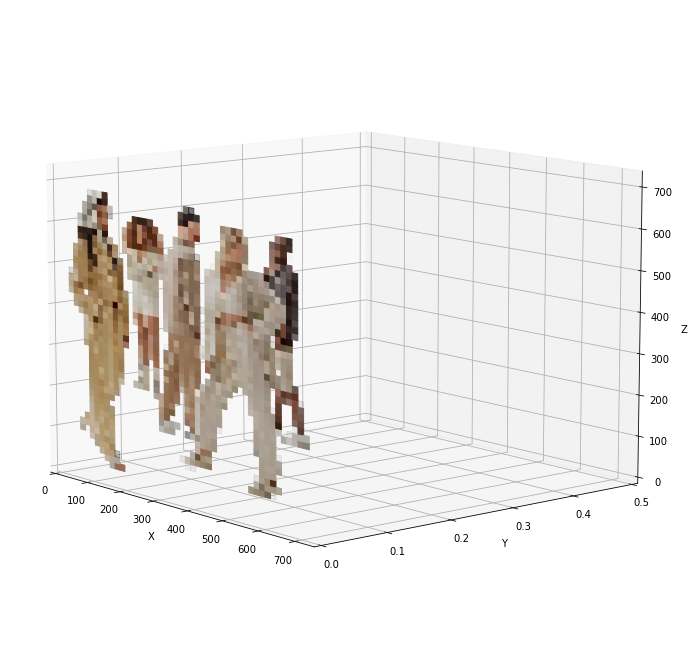

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111,projection='3d')

img1 = np.flip(plt.imread('/transfer/MasterProject/test_segmented2/segmented_image_12.png'), axis=0)
img2 = np.flip(plt.imread('/transfer/MasterProject/test_segmented2/segmented_image_22.png'), axis=0)
img3 = np.flip(plt.imread('/transfer/MasterProject/test_segmented2/segmented_image_23.png'), axis=0)
img4 = np.flip(plt.imread('/transfer/MasterProject/test_segmented2/segmented_image_32.png'), axis=0)
img5 = np.flip(plt.imread('/transfer/MasterProject/test_segmented2/segmented_image_5.png'), axis=0)

x,z = np.meshgrid(np.arange(img1.shape[1]),np.arange(img1.shape[0])) 

y1 = np.full_like(x,0.2803517) 
y2 = np.full_like(x,0.10217926) 
y3 = np.full_like(x,0.43926626)
y4 = np.full_like(x,0.6594761) 
y5 = np.full_like(x,0.0650597) 

ax.plot_surface(x, y1, z, facecolors=img1) 
ax.plot_surface(x, y2, z, facecolors=img2) 
ax.plot_surface(x, y3, z, facecolors=img3)
ax.plot_surface(x, y4, z, facecolors=img4) 
ax.plot_surface(x, y5, z, facecolors=img5) 

ax.set_xlim(0,img1.shape[1]) 
ax.set_zlim(0,img1.shape [0] ) 
ax.set_ylim(0,0.5) 
ax.set_xlabel('X' ) 
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=10,azim=-40)


plt.show()

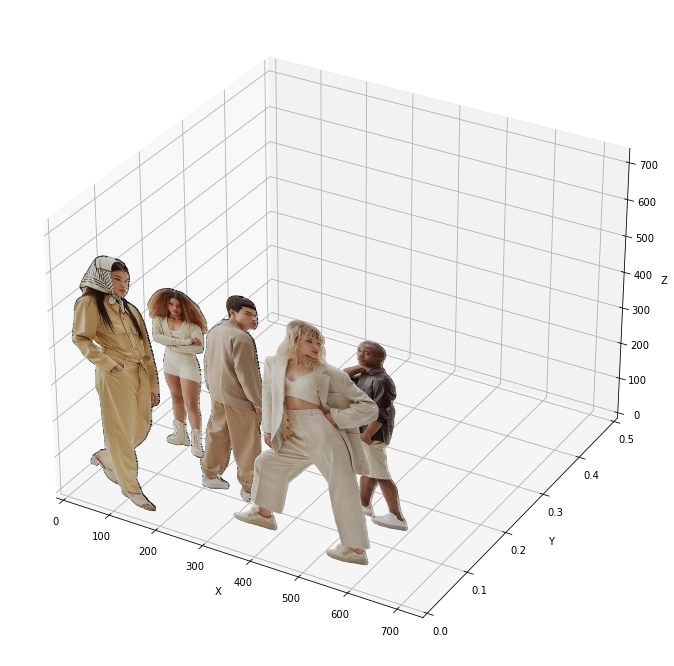

In [17]:
# High resolution 
# Long running time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111,projection='3d')

img1 = np.flip(plt.imread('/transfer/MasterProject/test_segmented2/segmented_image_12.png'), axis=0)
img2 = np.flip(plt.imread('/transfer/MasterProject/test_segmented2/segmented_image_22.png'), axis=0)
img3 = np.flip(plt.imread('/transfer/MasterProject/test_segmented2/segmented_image_23.png'), axis=0)
img4 = np.flip(plt.imread('/transfer/MasterProject/test_segmented2/segmented_image_32.png'), axis=0)
img5 = np.flip(plt.imread('/transfer/MasterProject/test_segmented2/segmented_image_5.png'), axis=0)

x,z = np.meshgrid(np.arange(img1.shape[1]),np.arange(img1.shape[0])) 

y1 = np.full_like(x,0.2803517) 
y2 = np.full_like(x,0.10217926) 
y3 = np.full_like(x,0.43926626)
y4 = np.full_like(x,0.6594761) 
y5 = np.full_like(x,0.0650597) 

ax.plot_surface(x, y1, z, facecolors=img1, rcount=img1.shape[0], ccount=img1.shape[1]) 
ax.plot_surface(x, y2, z, facecolors=img2, rcount=img2.shape[0], ccount=img2.shape[1]) 
ax.plot_surface(x, y3, z, facecolors=img3, rcount=img3.shape[0], ccount=img3.shape[1])
ax.plot_surface(x, y4, z, facecolors=img4, rcount=img4.shape[0], ccount=img4.shape[1]) 
ax.plot_surface(x, y5, z, facecolors=img5, rcount=img5.shape[0], ccount=img5.shape[1]) 

ax.set_xlim(0,img1.shape[1]) 
ax.set_zlim(0,img1.shape [0] ) 
ax.set_ylim(0,0.5) 
ax.set_xlabel('X' ) 
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()